In [1211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# 1. Data Processing

In [1212]:
#read data after preperation
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv',parse_dates=[2])
test = pd.read_csv('test.csv')

In [1213]:
train.sort_values(by='Date',inplace = True, ascending = False) 

In [1214]:
df = train.copy()

In [1215]:
test.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [1197]:
split_index = 6*7*1115
valid = df[:split_index] 
train = df[split_index:]

Text(0.5, 1.0, 'Store 4, 274 and 1116 Sales Distribution')

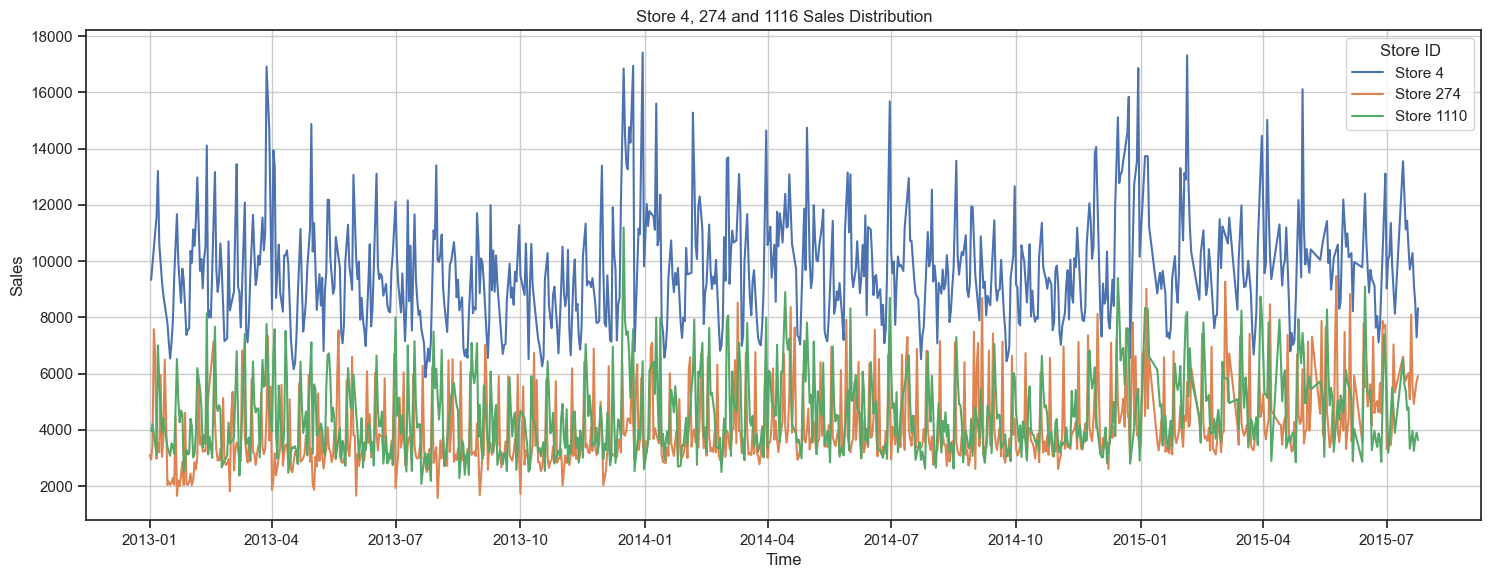

In [1207]:
store_4 = train.loc[(train["Store"]==4)&(train['Sales']>0), ['Date',"Sales"]]
store_274 = train.loc[(train["Store"]==274)&(train['Sales']>0), ['Date',"Sales"]]
store_1110 = train.loc[(train["Store"]==1110)&(train['Sales']>0), ['Date',"Sales"]]
f = plt.figure(figsize=(18,14))
plt.axvline(x =)
ax1 = f.add_subplot(211)
ax1.plot(store_4['Date'], store_4['Sales'], '-',label = 'Store 4')
ax1.plot(store_274['Date'], store_274['Sales'], '-',label = 'Store 274')
ax1.plot(store_1110['Date'], store_1110['Sales'], '-',label = 'Store 1110')
ax1.grid()
ax1.vline
ax1.legend(title = "Store ID")
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 4, 274 and 1116 Sales Distribution')

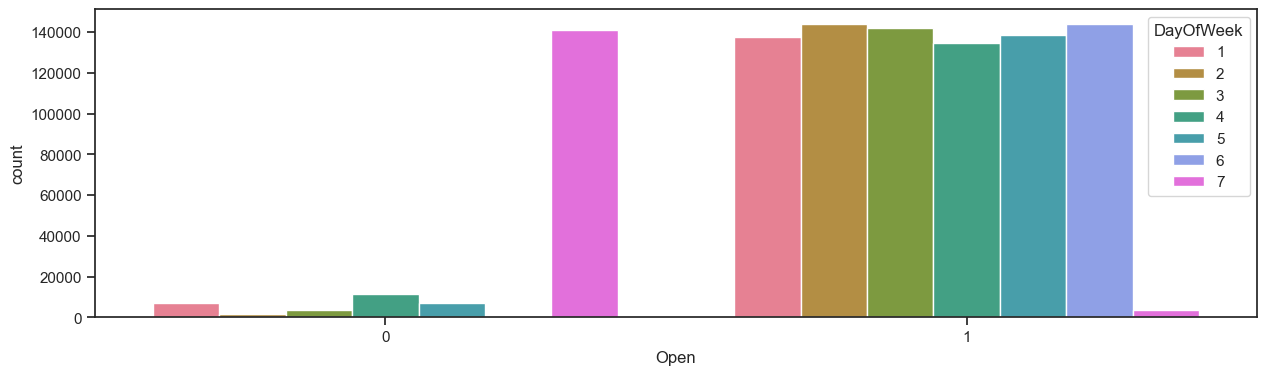

In [1113]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train,palette="husl", ax=axis1)

# fill NaN values in test_df with Open=1 if DayOfWeek != 7
test["Open"][test["Open"] != test["Open"]] = (test["DayOfWeek"] != 7).astype(int)

In [1114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41088 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


## 1.1 Process store.csv

In [1115]:
#show data, to see if the dataset is successfully read
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


* Feature explaining in store.csv:  
Store: a unique Id for each store  
StoreType: differentiates between 4 different store models: a, b, c, d.  
Assortment: describes an assortment level: a = basic, b = extra, c = extended  
CompetitionDistance: distance in meters to the nearest competitor store  
CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened  
Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating   
Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2  
PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1116]:
#check datatype and the number of null values
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [1117]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'CompetitionDistance'}>,
        <AxesSubplot: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot: title={'center': 'CompetitionOpenSinceYear'}>,
        <AxesSubplot: title={'center': 'Promo2'}>,
        <AxesSubplot: title={'center': 'Promo2SinceWeek'}>],
       [<AxesSubplot: title={'center': 'Promo2SinceYear'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

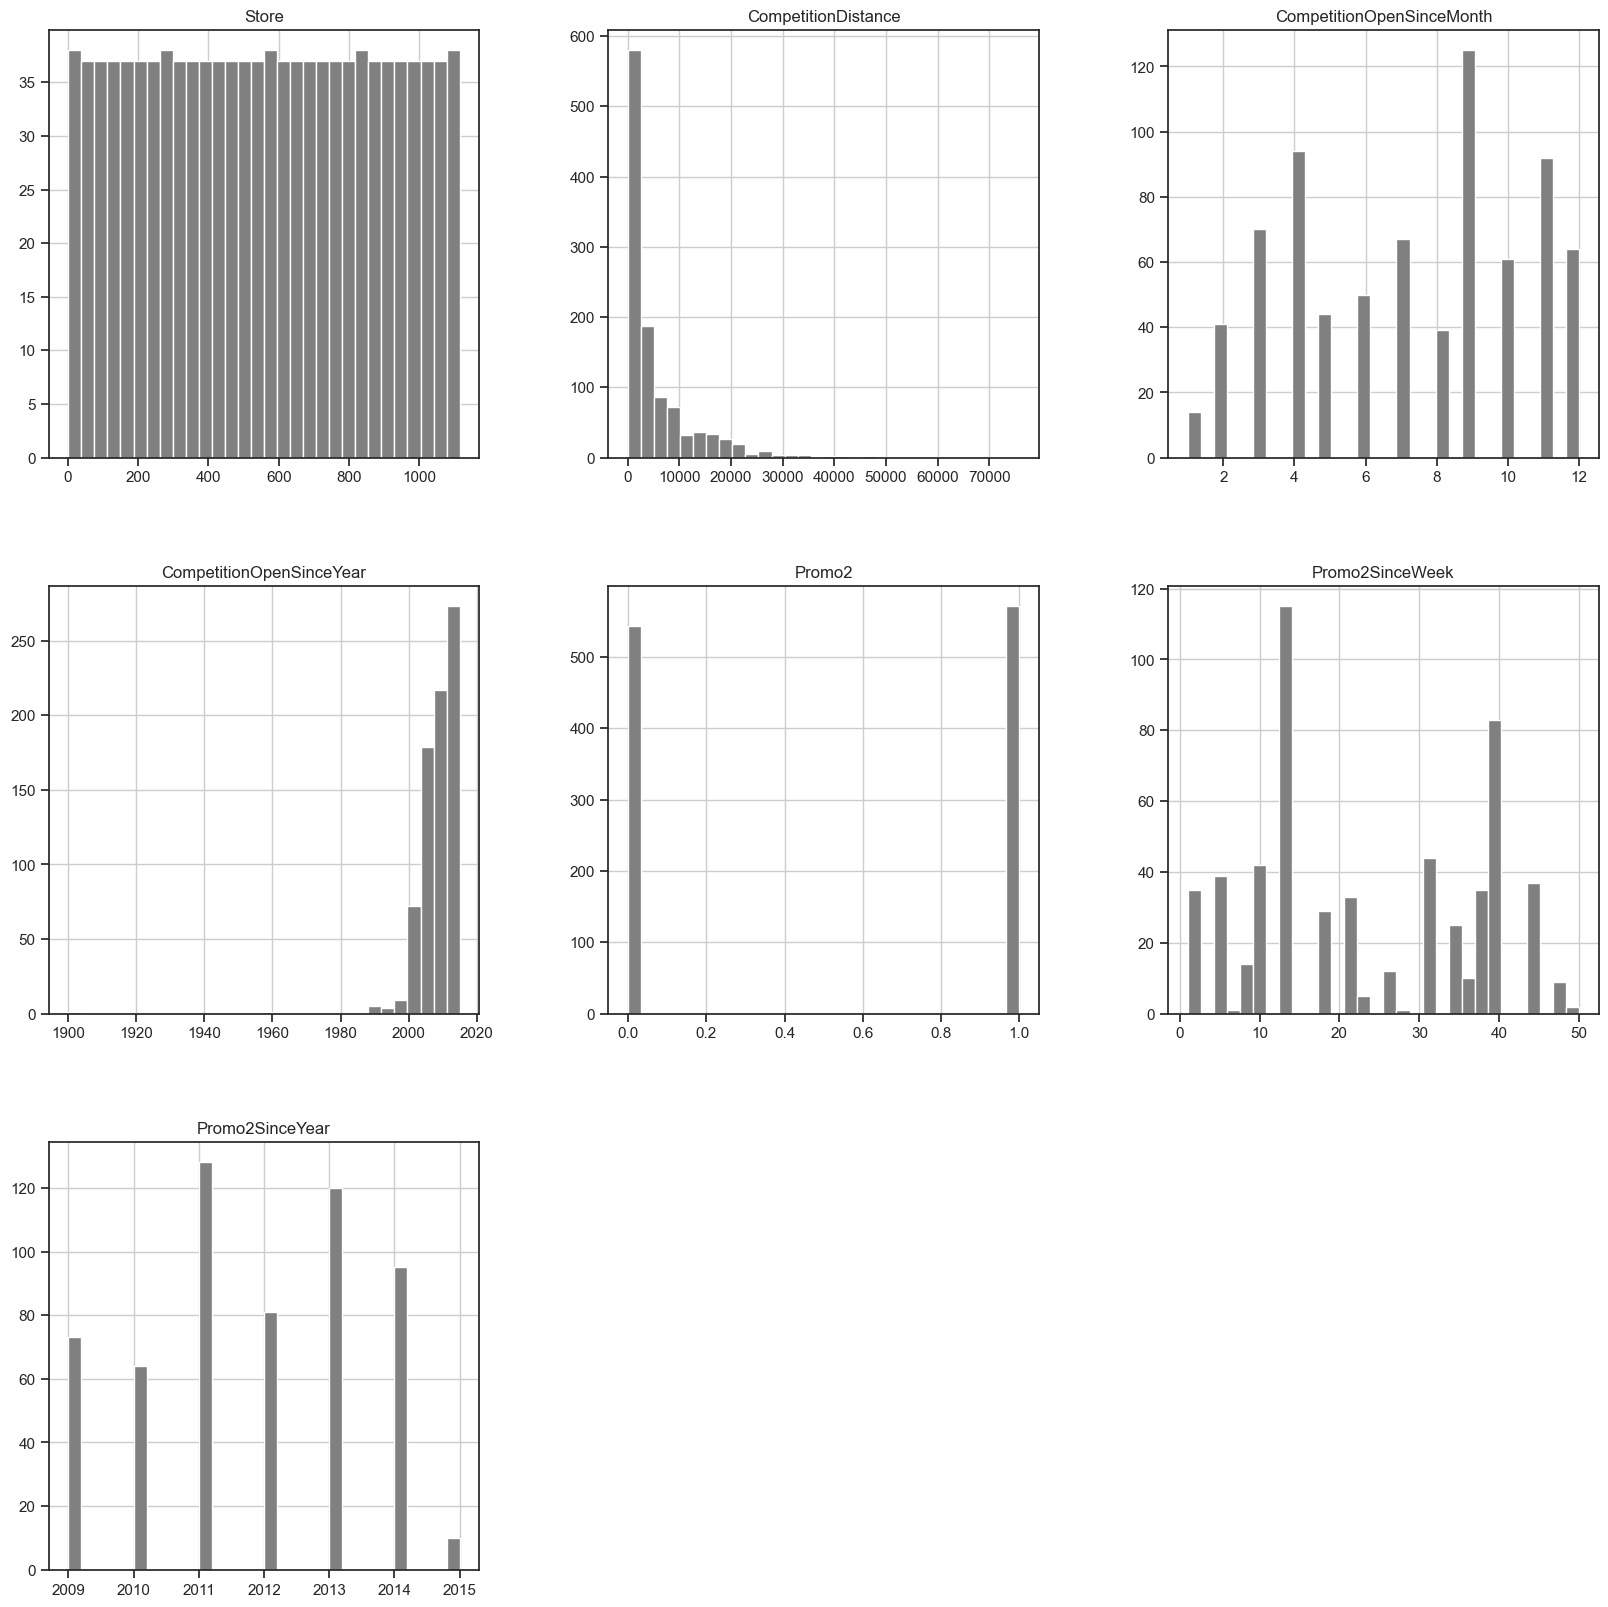

In [1118]:
store.hist(bins = 30, figsize=(20, 20), color = 'grey')

### 1.1.1 Missing value exploration
* Store has two types of missing value:  
Competition: CompetitionOpenSinceMonth & CompetitionOpenSinceYear  
Promotion: Promo2SinceWeek & Promo2SinceYear & PromoInterval

In [1119]:
# missing values in CompetitionDistance
store[store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [1120]:
# right skewed distribution
store['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [1121]:
# fill NaN with a median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [1122]:
# missing values in CompetitionOpenSinceYear & CompetitionOpenSinceYear
store[(store['CompetitionOpenSinceYear'].isnull())&(store['CompetitionOpenSinceYear'].isnull())].count()

Store                        354
StoreType                    354
Assortment                   354
CompetitionDistance          354
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                       354
Promo2SinceWeek              206
Promo2SinceYear              206
PromoInterval                206
dtype: int64

* There’s no row that only has CompetitionOpenSinceMonth value or CompetitionOpenSinceYear value.

In [1123]:
store.loc[store['CompetitionOpenSinceYear'].isnull(),'CompetitionDistance'].describe()

count      354.000000
mean      5404.533898
std       7381.042192
min         20.000000
25%        647.500000
50%       2425.000000
75%       7877.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

### 1.1.2 KDE of missing value in CompetitionDistance column

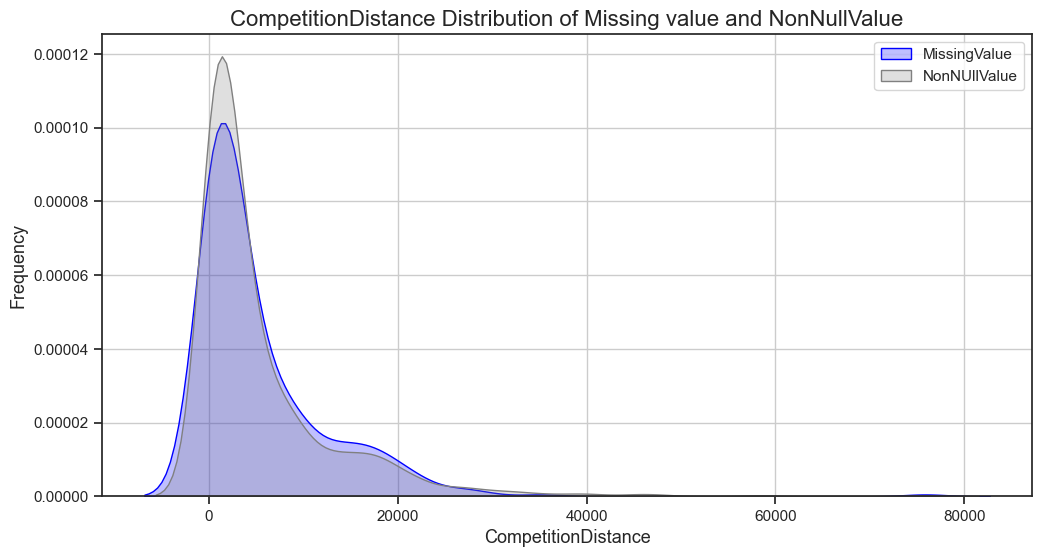

In [1124]:
distance_with_no_CompetitionOpenSinceYear = store.loc[store['CompetitionOpenSinceYear'].isnull(),'CompetitionDistance']
# KDE
plt.figure(figsize=(12,6))
g = sns.kdeplot(distance_with_no_CompetitionOpenSinceYear, color="Blue", shade = True)
g = sns.kdeplot(store['CompetitionDistance'], 
     ax =g, color="Grey", shade= True)
g.set_xlabel("CompetitionDistance",fontsize=13)
g.set_ylabel("Frequency",fontsize=13)
g.legend(["MissingValue","NonNUllValue"])
plt.title('CompetitionDistance Distribution of Missing value and NonNullValue',fontsize=16)
plt.grid()
plt.show()

* there's no significant difference between the distribution of NullValue and NonNullValue, hence we cannot assume that the null in CompetitionOpenSinceYear is because lack of competition
* so I'll combine this two variables into a new variable and leave them to the future train model(Not sure if I'm going to use this variable)

### 1.1.3 Fill the missing value in Promo2SinceWeek, Promo2SinceYear, PromoInterval using 0

In [1208]:
#Generate promo2 distribution

import plotly.graph_objs as go
import plotly.offline as py
# 2 datasets
P = store[(store['Promo2'] != 0)]
NP = store[(store['Promo2'] == 0)]

#------------COUNT-----------------------
def promotion2_count():
    trace = go.Bar( x = store['Promo2'].value_counts().values.tolist(), 
                    y = ['No Promotion2','Promotion2' ], 
                    orientation = 'h', 
                    text=store['Promo2'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Promotion2 in Store.csv')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
    
promotion2_count()

In [1126]:
# missing value in Promo2SinceWeek, Promo2SinceYear, PromoInterval
nan_Promo2SinceWeek = store[store['Promo2SinceWeek'].isna()]
nan_Promo2SinceWeek[nan_Promo2SinceWeek['Promo2'] != 0].shape

(0, 10)

In [1127]:
store[(store['Promo2'] == 0) & (store['Promo2SinceWeek'].isna())& (store['Promo2SinceYear'].isna()) & (store['PromoInterval'].isna())]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


* Here the missing value in Promo2SinceWeek, Promo2SinceYear, PromoInterval means the store doesn’t participate the Promo2.

In [1128]:
store = store.fillna(value={'Promo2SinceWeek':0,'Promo2SinceYear':0, 'PromoInterval':0})
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,0


### 1.1.4 One-hot encoder for StoreType

In [1129]:
# One-hot encoding 
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_Store_StoreType = pd.DataFrame(encoder.fit_transform(store[['StoreType']]).toarray())

#change column name 
encoder_Store_StoreType.columns = ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']

#merge one-hot encoded columns back with original DataFrame
store1_with_StoreType_Encoding = store.join(encoder_Store_StoreType)
store1_with_StoreType_Encoding

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,0,1.0,0.0,0.0,0.0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,0,1.0,0.0,0.0,0.0


### 1.1.5 Encoding Assortment 
* a,b,c discribe different assortment level, they are not indifferent, so we'd better use simple encoding, not one-hot

In [1130]:
mappings = {'a':1, 'b':2, 'c':3}
store1_with_StoreType_Encoding.Assortment.replace(mappings, inplace=True)
store1_with_StoreType_Encoding

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,c,1,1270.0,9.0,2008.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0
1,2,a,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0
2,3,a,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0
3,4,c,3,620.0,9.0,2009.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0
4,5,a,1,29910.0,4.0,2015.0,0,0.0,0.0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,1,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0
1111,1112,c,3,1880.0,4.0,2006.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0
1112,1113,a,3,9260.0,NaN,NaN,0,0.0,0.0,0,1.0,0.0,0.0,0.0
1113,1114,a,3,870.0,NaN,NaN,0,0.0,0.0,0,1.0,0.0,0.0,0.0


### 1.16 Generate new columns: CompetitionSinceDate

In [1131]:
# Convert float columns to string except 'CompetitionOpenSinceMonth'
store1_with_StoreType_Encoding = store1_with_StoreType_Encoding.astype({"Promo2SinceYear": 'str', "CompetitionOpenSinceMonth": 'str',"CompetitionOpenSinceYear": 'str',"Promo2SinceWeek":'str'})

# Delete the '.0' of these float columns
store1_with_StoreType_Encoding["Promo2SinceYear"] = store1_with_StoreType_Encoding["Promo2SinceYear"].apply(lambda x: x[:-2])
store1_with_StoreType_Encoding["Promo2SinceWeek"] = store1_with_StoreType_Encoding["Promo2SinceWeek"].apply(lambda x: x[:-2])
store1_with_StoreType_Encoding["CompetitionOpenSinceYear"] = store1_with_StoreType_Encoding["CompetitionOpenSinceYear"].apply(lambda x: x[:-2])
store1_with_StoreType_Encoding["CompetitionOpenSinceMonth"] = store1_with_StoreType_Encoding["CompetitionOpenSinceMonth"].apply(lambda x: x[:-2])

# replace 'n' in CompetitionOpenSinceMonth to 1
store1_with_StoreType_Encoding["CompetitionOpenSinceMonth"] = store1_with_StoreType_Encoding["CompetitionOpenSinceMonth"].replace('n','1')
# replace 'n' in CompetitionOpenSinceMonth to 2013
store1_with_StoreType_Encoding["CompetitionOpenSinceYear"] = store1_with_StoreType_Encoding["CompetitionOpenSinceYear"].replace('n','2013')
# Generate a new feature called 'CompetitionSinceDate'
store1_with_StoreType_Encoding["CompetitionSinceDate"] = store1_with_StoreType_Encoding[["CompetitionOpenSinceYear", "CompetitionOpenSinceMonth"]].apply("-".join, axis=1)
# Complete the whole Datetime by adding '-1'
store1_with_StoreType_Encoding["CompetitionSinceDate"] = store1_with_StoreType_Encoding["CompetitionSinceDate"] + str('-1')
# Transfer new feature:CompetitionSinceDate to datetime
store1_with_StoreType_Encoding["CompetitionSinceDate"] = pd.to_datetime(store1_with_StoreType_Encoding["CompetitionSinceDate"],format='%Y-%m-%d')

# Generate a new feature called 'Promo2YearWeek'
store1_with_StoreType_Encoding["Promo2YearWeek"] = store1_with_StoreType_Encoding[["Promo2SinceYear", "Promo2SinceWeek"]].apply("".join, axis=1)

store1_with_StoreType_Encoding

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionSinceDate,Promo2YearWeek
0,1,c,1,1270.0,9,2008,0,0,0,0,0.0,0.0,1.0,0.0,2008-09-01,00
1,2,a,1,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0,2007-11-01,201013
2,3,a,1,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0,2006-12-01,201114
3,4,c,3,620.0,9,2009,0,0,0,0,0.0,0.0,1.0,0.0,2009-09-01,00
4,5,a,1,29910.0,4,2015,0,0,0,0,1.0,0.0,0.0,0.0,2015-04-01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,1,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0,2014-06-01,201331
1111,1112,c,3,1880.0,4,2006,0,0,0,0,0.0,0.0,1.0,0.0,2006-04-01,00
1112,1113,a,3,9260.0,1,2013,0,0,0,0,1.0,0.0,0.0,0.0,2013-01-01,00
1113,1114,a,3,870.0,1,2013,0,0,0,0,1.0,0.0,0.0,0.0,2013-01-01,00


In [1132]:
# Drop duplicate columns
store = store1_with_StoreType_Encoding.drop(columns=['StoreType', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2','Promo2SinceYear'])
store

,Store,Assortment,CompetitionDistance,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionSinceDate,Promo2YearWeek
0,1,1,1270.0,0,0.0,0.0,1.0,0.0,2008-09-01,00
1,2,1,570.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0,2007-11-01,201013
2,3,1,14130.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0,2006-12-01,201114
3,4,3,620.0,0,0.0,0.0,1.0,0.0,2009-09-01,00
4,5,1,29910.0,0,1.0,0.0,0.0,0.0,2015-04-01,00
...,...,...,...,...,...,...,...,...,...,...
1110,1111,1,1900.0,"Jan,Apr,Jul,Oct",1.0,0.0,0.0,0.0,2014-06-01,201331
1111,1112,3,1880.0,0,0.0,0.0,1.0,0.0,2006-04-01,00
1112,1113,3,9260.0,0,1.0,0.0,0.0,0.0,2013-01-01,00
1113,1114,3,870.0,0,1.0,0.0,0.0,0.0,2013-01-01,00


## 1.2 Process train.csv

In [1133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1017208 to 22299
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 77.6+ MB


*  apparently there's no missing value in train.csv, means we're going to select features/generate new features on this dataset

In [1134]:
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1
21928,744,7,2015-12-07,0,0,0,0,0,0
21929,745,7,2015-12-07,0,0,0,0,0,0
21930,746,7,2015-12-07,0,0,0,0,0,0
21924,740,7,2015-12-07,0,0,0,0,0,0
22299,1115,7,2015-12-07,0,0,0,0,0,0


* Description of features:  
Sales: the turnover for any given day (target variable).  
Customers: the number of customers on a given day.  
Open: an indicator for whether the store was open: 0 = closed, 1 = open.  
Promo: indicates whether a store is running a promo on that day.  
StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.  
SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'DayOfWeek'}>,
        <AxesSubplot: title={'center': 'Date'}>],
       [<AxesSubplot: title={'center': 'Sales'}>,
        <AxesSubplot: title={'center': 'Customers'}>,
        <AxesSubplot: title={'center': 'Open'}>],
       [<AxesSubplot: title={'center': 'Promo'}>,
        <AxesSubplot: title={'center': 'SchoolHoliday'}>,
        <AxesSubplot: >]], dtype=object)

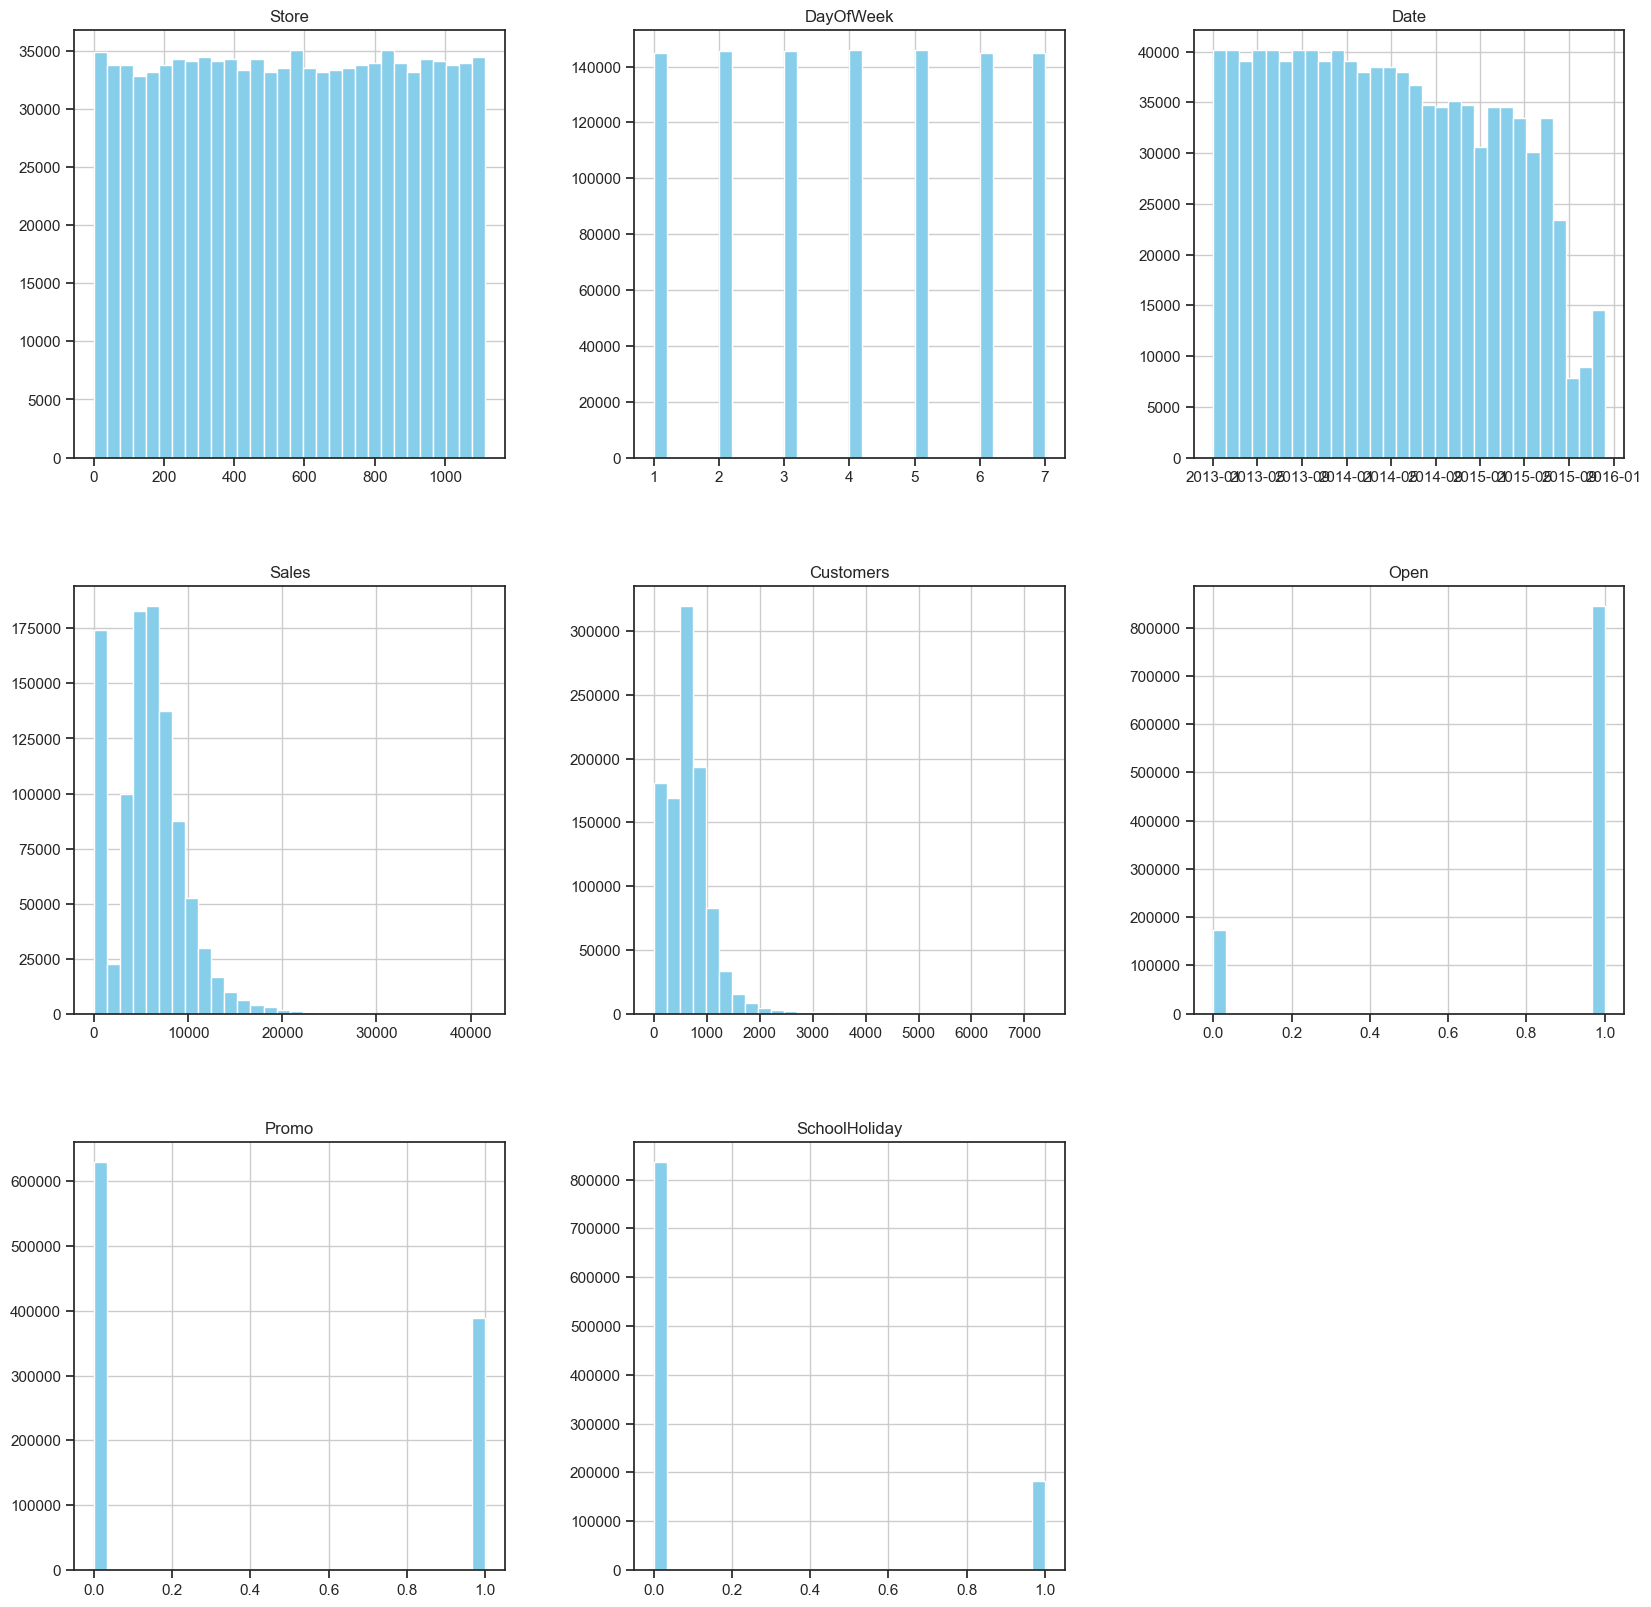

In [1135]:
train.hist(bins = 30, figsize=(20, 20), color = 'skyblue')

### 1.2.1 Date consistency check of train.csv

In [1136]:
# check data consistency: if the store is closed, then there must be no sale on that day
a = len(train[train['Open'] == 0])
b = len(train[(train['Open'] == 0) & (train['Sales'] == 0)])
print('There are',a,'not open records.','\nThere are',b,'not only not open but also have no sales data.')

There are 172817 not open records. 
There are 172817 not only not open but also have no sales data.


* if the store is closed, then there must be no sale on that day 

In [1137]:
# check if there's a situation that customers came to the shop but didn't make any purchase
train[(train['Sales'] == 0) & (train['Customers'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
889932,948,4,2013-04-25,0,5,1,1,0,0
478649,1100,2,2014-04-29,0,3,1,1,0,0


* On 2013-04-25, store 948 got 5 customers but had no sales.  
On 2014-04-29, store 1100 got 5 customers but had no sales.  
It's a small  probability thing. Generally customers and sales follow a postive relation.

### 1.2.2 Promotion Visualization (since Promo2 appeared in store.csv, we're going to see the detail distribution of promo status in train data)

In [1138]:
#Generate promotion status distribution
# 2 datasets
P = train[(train['Promo'] != 0)]
NP = train[(train['Promo'] == 0)]

#------------COUNT-----------------------
def promotion_count():
    trace = go.Bar( x = train['Promo'].value_counts().values.tolist(), 
                    y = ['No Promotion','Promotion' ], 
                    orientation = 'h', 
                    text=train['Promo'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Promotion State in Train.csv')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
    
promotion_count()

### 1.2.3 One-hot encoding for StateHoliday
* there are four types of StateHoliday data: 0, 'a', 'b', 'c'  
we cannot say if there is existing any significant difference/priority between these three stats,  
even though tree-based model doesn't that need one-hot encoding, we're going to apply other models,  
so I still applied one-hot encoding to deal with state holiday

In [1139]:
train['StateHoliday'].unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

In [1140]:
print(train['StateHoliday'].value_counts())

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


In [1141]:
# Replace '0' in 'StateHoliday' using int 0.
train['StateHoliday'] = train['StateHoliday'].replace('0', 0 )
print(train['StateHoliday'].value_counts())

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


In [1142]:
# use mapping to make all data in 'StateHoliday' is int
mappings = {0:0, 'a':1, 'b':2, 'c':3, 'd':4}
train['StateHoliday'].replace(mappings, inplace=True)

In [1143]:
# sort by index(ascending), for one-hot encoding
train = train.sort_index()
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1


In [1144]:
# Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_train_StateHoliday = pd.DataFrame(encoder.fit_transform(train[['StateHoliday']]).toarray())
encoder_train_StateHoliday.columns = ['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']
train1_wth_StateHoliday_Encoding = train.join(encoder_train_StateHoliday)
train1_wth_StateHoliday_Encoding

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,0,1,1.0,0.0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,1.0,0.0,0.0,0.0
2,3,5,2015-07-31,8314,821,1,1,0,1,1.0,0.0,0.0,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,1.0,0.0,0.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0.0,1.0,0.0,0.0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,0.0,1.0,0.0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0.0,1.0,0.0,0.0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0.0,1.0,0.0,0.0


### 1.2.4 One-hot encoding for DayOfWeek

In [1145]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_train_DayOfWeek = pd.DataFrame(encoder.fit_transform(train[['DayOfWeek']]).toarray())
encoder_train_DayOfWeek.columns = ['Day_1_OfWeek', 'Day_2_OfWeek', 'Day_3_OfWeek', 'Day_4_OfWeek','Day_5_OfWeek','Day_6_OfWeek','Day_7_OfWeek']
train2_with_DayOfWeek_Encoder = train1_wth_StateHoliday_Encoding.join(encoder_train_DayOfWeek)
train = train2_with_DayOfWeek_Encoder
train = train.drop(columns=['DayOfWeek','StateHoliday'])

### 1.2.5 Data extraction and generation for train.csv

In [1146]:
# Data Extraction
train['Year'] = train['Date'].dt.year  
train['Month'] = train['Date'].dt.month 
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

# Convert 'Year','WeekOfYear' type to string
train = train.astype({"Year": 'str', "WeekOfYear": 'str'})
# Genereate a new column 'YearWeak'
train['WeakYear'] = train['Year'] + train['WeekOfYear']

# Indicate whether the month is in promo interval
monthmapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
train['MonthAbb'] = train['Month'].map(monthmapping)

train

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,Day_3_OfWeek,Day_4_OfWeek,Day_5_OfWeek,Day_6_OfWeek,Day_7_OfWeek,Year,Month,WeekOfYear,WeakYear,MonthAbb
0,1,2015-07-31,5263,555,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2015,7,31,201531,Jul
1,2,2015-07-31,6064,625,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2015,7,31,201531,Jul
2,3,2015-07-31,8314,821,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2015,7,31,201531,Jul
3,4,2015-07-31,13995,1498,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2015,7,31,201531,Jul
4,5,2015-07-31,4822,559,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2015,7,31,201531,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013,1,1,20131,Jan
1017205,1112,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013,1,1,20131,Jan
1017206,1113,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013,1,1,20131,Jan
1017207,1114,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013,1,1,20131,Jan


* Another way to extract date time from the 'Date' column by setting 'Date' as the index:  
train = train.set_index('Date')  
train['Year'] = train.index.year  
train['Month'] = train.index.month  
train['Day'] = train.index.day  
train['WeekOfYear'] = train.index.weekofyear

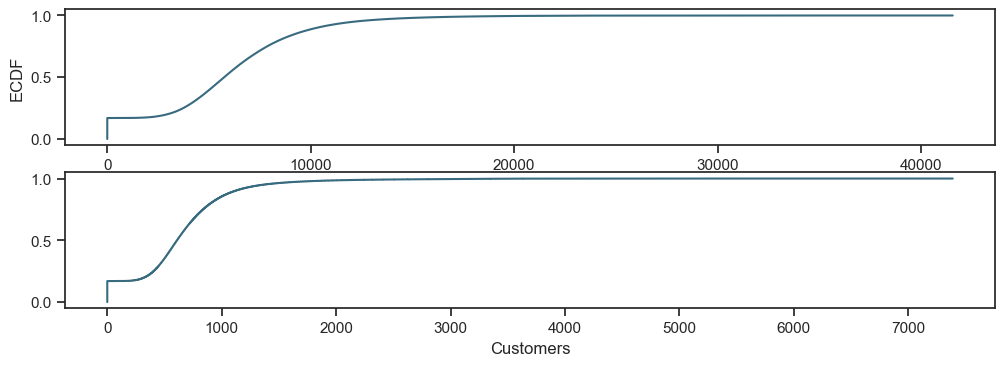

In [1147]:
# ECDF but not sure if I'm going to use it
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

### 1.2.6 Join Train with Store

In [1148]:
# inner join
train_store = pd.merge(train, store, how = 'inner', on = 'Store')
train_store

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,MonthAbb,Assortment,CompetitionDistance,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionSinceDate,Promo2YearWeek
0,1,2015-07-31,5263,555,1,1,1,1.0,0.0,0.0,...,Jul,1,1270.0,0,0.0,0.0,1.0,0.0,2008-09-01,00
1,1,2015-07-30,5020,546,1,1,1,1.0,0.0,0.0,...,Jul,1,1270.0,0,0.0,0.0,1.0,0.0,2008-09-01,00
2,1,2015-07-29,4782,523,1,1,1,1.0,0.0,0.0,...,Jul,1,1270.0,0,0.0,0.0,1.0,0.0,2008-09-01,00
3,1,2015-07-28,5011,560,1,1,1,1.0,0.0,0.0,...,Jul,1,1270.0,0,0.0,0.0,1.0,0.0,2008-09-01,00
4,1,2015-07-27,6102,612,1,1,1,1.0,0.0,0.0,...,Jul,1,1270.0,0,0.0,0.0,1.0,0.0,2008-09-01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1,1.0,0.0,0.0,...,May,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,2013-01-01,201222
1017205,1115,2013-04-01,4540,326,1,0,1,1.0,0.0,0.0,...,Apr,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,2013-01-01,201222
1017206,1115,2013-03-01,4297,300,1,0,1,1.0,0.0,0.0,...,Mar,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,2013-01-01,201222
1017207,1115,2013-02-01,3697,305,1,0,1,1.0,0.0,0.0,...,Feb,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,2013-01-01,201222


In [1149]:
# Generate a new feature: CompetitionOpenDate
train_store['CompetitionOpenDate'] = train_store['Date'] - train_store['CompetitionSinceDate']

In [1150]:
# Generate New feature: IfCompetition
train_store['IfCompetition'] = np.where((train_store['CompetitionSinceDate'] <= train_store['Date']),1,0)
# Drop 'CompetitionSinceDate'
train_store = train_store.drop(['CompetitionSinceDate'], axis=1)

In [1151]:
# Transfer data type for numpy application
train_store = train_store.astype({"Promo2YearWeek": 'int', "WeakYear": 'int'})
# Generate New feature: IfCompetition
train_store['IfPromo2'] = np.where((train_store['Promo2YearWeek'] <= train_store['WeakYear']),1,0)
# Drop 'Promo2YearWeek' and 'WeekOfYear'
train_store = train_store.drop(['Promo2YearWeek','WeakYear'], axis=1)
train_store

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,Assortment,CompetitionDistance,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2
0,1,2015-07-31,5263,555,1,1,1,1.0,0.0,0.0,...,1,1270.0,0,0.0,0.0,1.0,0.0,2524 days,1,1
1,1,2015-07-30,5020,546,1,1,1,1.0,0.0,0.0,...,1,1270.0,0,0.0,0.0,1.0,0.0,2523 days,1,1
2,1,2015-07-29,4782,523,1,1,1,1.0,0.0,0.0,...,1,1270.0,0,0.0,0.0,1.0,0.0,2522 days,1,1
3,1,2015-07-28,5011,560,1,1,1,1.0,0.0,0.0,...,1,1270.0,0,0.0,0.0,1.0,0.0,2521 days,1,1
4,1,2015-07-27,6102,612,1,1,1,1.0,0.0,0.0,...,1,1270.0,0,0.0,0.0,1.0,0.0,2520 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1,1.0,0.0,0.0,...,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,120 days,1,1
1017205,1115,2013-04-01,4540,326,1,0,1,1.0,0.0,0.0,...,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,90 days,1,1
1017206,1115,2013-03-01,4297,300,1,0,1,1.0,0.0,0.0,...,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,59 days,1,0
1017207,1115,2013-02-01,3697,305,1,0,1,1.0,0.0,0.0,...,3,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,31 days,1,0


### 1.2.7 Encoding Promo2Interval

* If the data is in Promo Inrerval, IsPromoMonth is 1

In [1152]:
def check(data):
    if isinstance(data['PromoInterval'],str) and data['MonthAbb'] in data['PromoInterval']:
        return 1
    else:
        return 0
        
train_store['IsPromoMonth'] =  train_store.apply(lambda data: check(data),axis=1)    
train_store

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,CompetitionDistance,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
0,1,2015-07-31,5263,555,1,1,1,1.0,0.0,0.0,...,1270.0,0,0.0,0.0,1.0,0.0,2524 days,1,1,0
1,1,2015-07-30,5020,546,1,1,1,1.0,0.0,0.0,...,1270.0,0,0.0,0.0,1.0,0.0,2523 days,1,1,0
2,1,2015-07-29,4782,523,1,1,1,1.0,0.0,0.0,...,1270.0,0,0.0,0.0,1.0,0.0,2522 days,1,1,0
3,1,2015-07-28,5011,560,1,1,1,1.0,0.0,0.0,...,1270.0,0,0.0,0.0,1.0,0.0,2521 days,1,1,0
4,1,2015-07-27,6102,612,1,1,1,1.0,0.0,0.0,...,1270.0,0,0.0,0.0,1.0,0.0,2520 days,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1,1.0,0.0,0.0,...,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,120 days,1,1,0
1017205,1115,2013-04-01,4540,326,1,0,1,1.0,0.0,0.0,...,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,90 days,1,1,0
1017206,1115,2013-03-01,4297,300,1,0,1,1.0,0.0,0.0,...,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,59 days,1,0,1
1017207,1115,2013-02-01,3697,305,1,0,1,1.0,0.0,0.0,...,5350.0,"Mar,Jun,Sept,Dec",0.0,0.0,0.0,1.0,31 days,1,0,0


In [1153]:
# Drop 'PromoInterval'
train_store = train_store.drop(['PromoInterval'], axis=1)

In [1154]:
# Transfer CompetitionOpenDate datatype from CompetitionOpenDate to string
train_store['CompetitionOpenDate'] = train_store['CompetitionOpenDate'].apply(lambda x: str(x)[:-14])
train_store

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,Assortment,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
0,1,2015-07-31,5263,555,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2524,1,1,0
1,1,2015-07-30,5020,546,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2523,1,1,0
2,1,2015-07-29,4782,523,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2522,1,1,0
3,1,2015-07-28,5011,560,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2521,1,1,0
4,1,2015-07-27,6102,612,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2520,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,120,1,1,0
1017205,1115,2013-04-01,4540,326,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,90,1,1,0
1017206,1115,2013-03-01,4297,300,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,59,1,0,1
1017207,1115,2013-02-01,3697,305,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,31,1,0,0


In [1155]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   SchoolHoliday        1017209 non-null  int64         
 7   StateHoliday_0       1017209 non-null  float64       
 8   StateHoliday_a       1017209 non-null  float64       
 9   StateHoliday_b       1017209 non-null  float64       
 10  StateHoliday_c       1017209 non-null  float64       
 11  Day_1_OfWeek         1017209 non-null  float64       
 12  Day_2_OfWeek         1017209 non-null  float64       
 1

In [1156]:
# Save as a new csv doc
train_store.to_csv('train_store1.csv', index = False)  

In [1157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41088 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [1158]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [1159]:
mappings = {'0':0, 'a':1}
test['StateHoliday'].replace(mappings, inplace=True)
test = test.sort_index()

In [1160]:
test['StateHoliday'].unique()

array([0, 1])

In [1161]:
# Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_test_StateHoliday = pd.DataFrame(encoder.fit_transform(test[['StateHoliday']]).toarray())
encoder_test_StateHoliday.columns = ['StateHoliday_0', 'StateHoliday_a']
test1 = test.join(encoder_test_StateHoliday)
test1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,1.0,0.0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,1.0,0.0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,1.0,0.0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,1.0,0.0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0,1.0,0.0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0,1.0,0.0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0,1.0,0.0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0,1.0,0.0


In [1162]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_test_DayOfWeek = pd.DataFrame(encoder.fit_transform(test[['DayOfWeek']]).toarray())
encoder_test_DayOfWeek.columns = ['Day_1_OfWeek', 'Day_2_OfWeek', 'Day_3_OfWeek', 'Day_4_OfWeek','Day_5_OfWeek','Day_6_OfWeek','Day_7_OfWeek']
test2 = test1.join(encoder_test_DayOfWeek)
#test = test2.drop(columns=['DayOfWeek','StateHoliday','SchoolHoliday'])

In [1163]:
test2['SchoolHoliday'].unique()

array([0, 1])

In [1164]:
test = test2
test["Date"]= pd.to_datetime(test["Date"])

In [1165]:
# Data Extraction
test['Year'] = test['Date'].dt.year  
test['Month'] = test['Date'].dt.month 
test['WeekOfYear'] = test['Date'].dt.isocalendar().week

# Convert 'Year','WeekOfYear' type to string
test = test.astype({"Year": 'str', "WeekOfYear": 'str'})
# Genereate a new column 'YearWeak'
test['WeakYear'] = test['Year'] + test['WeekOfYear']

# Indicate whether the month is in promo interval
monthmapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
test['MonthAbb'] = test['Month'].map(monthmapping)

test


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday_0,...,Day_3_OfWeek,Day_4_OfWeek,Day_5_OfWeek,Day_6_OfWeek,Day_7_OfWeek,Year,Month,WeekOfYear,WeakYear,MonthAbb
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,2015,9,38,201538,Sept
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,2015,9,38,201538,Sept
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,2015,9,38,201538,Sept
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,2015,9,38,201538,Sept
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,2015,9,38,201538,Sept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-01-08,NaN,NaN,1.0,0,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,2015,1,2,20152,Jan
41084,1112,6,2015-01-08,NaN,NaN,1.0,0,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,2015,1,2,20152,Jan
41085,1113,6,2015-01-08,NaN,NaN,1.0,0,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,2015,1,2,20152,Jan
41086,1114,6,2015-01-08,NaN,NaN,1.0,0,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,2015,1,2,20152,Jan


In [1166]:
# inner join
test_store = pd.merge(test, store, how = 'inner', on = 'Store')
# Generate a new feature: CompetitionOpenDate
test_store['CompetitionOpenDate'] = test_store['Date'] - test_store['CompetitionSinceDate']
# Generate New feature: IfCompetition
test_store['IfCompetition'] = np.where((test_store['CompetitionSinceDate'] <= test_store['Date']),1,0)
# Transfer data type for numpy application
test_store = test_store.astype({"Promo2YearWeek": 'int', "WeakYear": 'int'})
# Generate New feature: IfCompetition
test_store['IfPromo2'] = np.where((test_store['Promo2YearWeek'] <= test_store['WeakYear']),1,0)
def check(data):
    if isinstance(data['PromoInterval'],str) and data['MonthAbb'] in data['PromoInterval']:
        return 1
    else:
        return 0
        
test_store['IsPromoMonth'] =  test_store.apply(lambda data: check(data),axis=1)    

# Transfer CompetitionOpenDate datatype from CompetitionOpenDate to string
test_store['CompetitionOpenDate'] = test_store['CompetitionOpenDate'].apply(lambda x: str(x)[:-14])
test_store


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday_0,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionSinceDate,Promo2YearWeek,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,1.0,...,0.0,0.0,1.0,0.0,2008-09-01,0,2572,1,1,0
1,1,3,2015-09-16,NaN,NaN,1.0,1,0,0,1.0,...,0.0,0.0,1.0,0.0,2008-09-01,0,2571,1,1,0
2,1,2,2015-09-15,NaN,NaN,1.0,1,0,0,1.0,...,0.0,0.0,1.0,0.0,2008-09-01,0,2570,1,1,0
3,1,1,2015-09-14,NaN,NaN,1.0,1,0,0,1.0,...,0.0,0.0,1.0,0.0,2008-09-01,0,2569,1,1,0
4,1,7,2015-09-13,NaN,NaN,0.0,0,0,0,1.0,...,0.0,0.0,1.0,0.0,2008-09-01,0,2568,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,3,2015-05-08,NaN,NaN,1.0,1,0,1,1.0,...,0.0,0.0,0.0,1.0,2013-01-01,201222,857,1,1,0
41084,1115,2,2015-04-08,NaN,NaN,1.0,1,0,1,1.0,...,0.0,0.0,0.0,1.0,2013-01-01,201222,827,1,1,0
41085,1115,1,2015-03-08,NaN,NaN,1.0,1,0,1,1.0,...,0.0,0.0,0.0,1.0,2013-01-01,201222,796,1,1,1
41086,1115,7,2015-02-08,NaN,NaN,0.0,0,0,1,1.0,...,0.0,0.0,0.0,1.0,2013-01-01,201222,768,1,0,0


In [1167]:

test_store = test_store.drop(['CompetitionOpenDate','Promo2YearWeek','CompetitionSinceDate','StateHoliday','DayOfWeek'], axis=1)
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                41088 non-null  int64         
 1   Date                 41088 non-null  datetime64[ns]
 2   Sales                0 non-null      float64       
 3   Customers            0 non-null      float64       
 4   Open                 41088 non-null  float64       
 5   Promo                41088 non-null  int64         
 6   SchoolHoliday        41088 non-null  int64         
 7   StateHoliday_0       41088 non-null  float64       
 8   StateHoliday_a       41088 non-null  float64       
 9   Day_1_OfWeek         41088 non-null  float64       
 10  Day_2_OfWeek         41088 non-null  float64       
 11  Day_3_OfWeek         41088 non-null  float64       
 12  Day_4_OfWeek         41088 non-null  float64       
 13  Day_5_OfWeek         41088 non-

In [1168]:
test_store = test_store.drop(['MonthAbb'], axis=1)
test_store['StateHoliday_c'] = 0
test_store['StateHoliday_d'] = 0
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                41088 non-null  int64         
 1   Date                 41088 non-null  datetime64[ns]
 2   Sales                0 non-null      float64       
 3   Customers            0 non-null      float64       
 4   Open                 41088 non-null  float64       
 5   Promo                41088 non-null  int64         
 6   SchoolHoliday        41088 non-null  int64         
 7   StateHoliday_0       41088 non-null  float64       
 8   StateHoliday_a       41088 non-null  float64       
 9   Day_1_OfWeek         41088 non-null  float64       
 10  Day_2_OfWeek         41088 non-null  float64       
 11  Day_3_OfWeek         41088 non-null  float64       
 12  Day_4_OfWeek         41088 non-null  float64       
 13  Day_5_OfWeek         41088 non-

In [1169]:
# Save as a new csv doc
test_store.to_csv('test_store.csv', index = False)  